In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Import dataset

In [2]:
file_path = r"C:\Users\sonki\test python\scikit-learn\data\Data.csv"
data_df = pd.read_csv(file_path)

In [3]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [5]:
for col in data_df.columns:
    missing_data= data_df[col].isna().sum() # isna trả về cột giá trị true (bị thiếu) và false là ngược lại
    missing_percent =  missing_data/len(data_df)*100
    print(f"Colum {col} :has { missing_percent}% missing data")

Colum Country :has 0.0% missing data
Colum Age :has 10.0% missing data
Colum Salary :has 10.0% missing data
Colum Purchased :has 0.0% missing data


<Axes: >

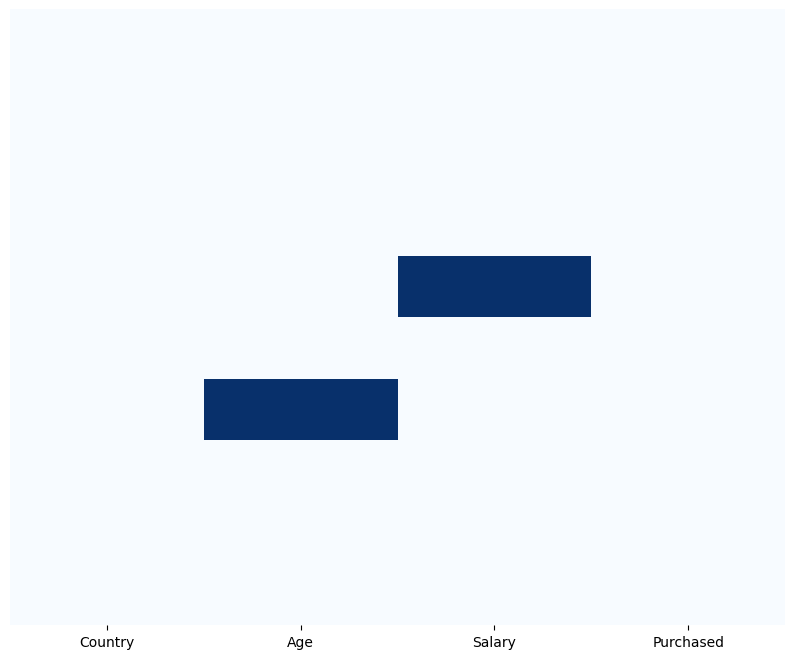

In [6]:
fig , ax =plt.subplots(figsize=(10,8))
sns.heatmap(data_df.isna(),cmap="Blues",cbar=False,yticklabels=False)

# xử lý dữ liệu khuyết 

In [7]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [8]:
x=data_df.iloc[:,:-1].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [9]:
y=data_df.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [10]:
from sklearn.impute import SimpleImputer #  công cụ để điền giá trị thiếu trong dữ liệu bằng một giá trị cụ thể
# Nó import một class hoặc đối tượng SimpleImputer từ module impute trong thư viện sklearn (scikit-learn).
imputer=SimpleImputer (missing_values=np.nan,strategy="mean")
imputer.fit(x[:,1:3]) # tính toán giá trị theo công thức được cho theo cột xác định 
x[:,1:3]=imputer.transform(x[:,1:3]) # điền giá trị vào tương ứng vào cột trống và gán để thay đổi

In [11]:
x[:,1:3]

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 63777.77777777778],
       [35.0, 58000.0],
       [38.77777777777778, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

# Encode categorical data ( mã hóa dữ liệu phân loại )
### Encode independent variable (x)

In [12]:
from sklearn.compose import ColumnTransformer # Xử lý nhiều cột linh hoạt
from sklearn.preprocessing import OneHotEncoder # chuyển dữ liệu thành số tương ứng
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")
x=ct.fit_transform(x)
x
# Trong đoạn mã này, chúng ta đang xác định một biến đổi cụ thể cho cột đầu tiên
# ( France,Spain,Germany,Age,Salery)

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [13]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [14]:
from sklearn.preprocessing import  LabelEncoder
# sử dụng để chuyển đổi các nhãn của dữ liệu phân loại thành các số nguyên tuân theo cấu trúc
le=LabelEncoder()
y=le.fit_transform(y)

In [15]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Slitting the dataset (x=data,y=output) into the Training set and Test set 

In [16]:
from sklearn.model_selection import train_test_split # để chia dữ liệu thành các tập huấn luyện và kiểm tra
np.random.seed(42)

x_train,x_test,y_train,y_test =train_test_split(x, y, test_size=0.2) 

In [17]:
x_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [18]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [19]:
x_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [20]:
y_test

array([0, 1])

In [21]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# Feature scaling
* There are 2 main Feature Scaling Technique: Standardisation & Normalisation (   Tiêu chuẩn hóa & Chuẩn hóa )
* Tiêu chuẩn hóa: Điều này làm cho tập dữ liệu, trung tâm ở 0 tức là trung bình tại 0 và thay đổi giá trị độ lệch chuẩn thành 1.
* Cách sử dụng: áp dụng tất cả các tình huống
* Chuẩn hóa: Điều này làm cho tập dữ liệu trong phạm vi [0, 1]
* Cách sử dụng: áp dụng khi tất cả các tính năng trong tập dữ liệu có phân phối chuẩn

In [22]:
from IPython.display import HTML
# Đường dẫn đến ảnh trên internet
image_url = "https://user-images.githubusercontent.com/64508435/104795502-e40d3780-57e9-11eb-91ce-bb68c43a715f.png"

# Hiển thị ảnh sử dụng thẻ HTML
HTML(f'<img src="{image_url}">')

In [23]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler ()
# Chuẩn hóa dữ liệu là quá trình biến đổi dữ liệu sao cho nó có trung bình gần bằng 0 và độ lệch chuẩn gần bằng 1
x_train[:,3:] = sc.fit_transform(x_train[:,3:])

In [24]:
x_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [25]:
x_test[:,3:]=sc.transform(x_test[:,3:])
x_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)